# Using convolution neural network with to classify fruit images
This is **Part 3** of the fruit classification project. In [**Part 1**](https://www.kaggle.com/rehanali88/kaggle-for-deep-learning-p-1-getting-data-ready) we split the data into training, validation and test sets. We saved these folders in zip format. In [**Part 2**](https://www.kaggle.com/rehanali88/kaggle-for-deep-learning-p-2-visualization-eda), we visually explored the data and calculated parameters to use in building convolution neural network.   
this part we will use the split data and the calculated parameters from the previous part to build a convolution neural network for fruit classification. 

## Importing required packages
Let's first import the packages we will need for our analysis. The comments show the usage of every package we are importing.

In [1]:
# the following line will make plots appear with out calling plt.show()
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # I/O of data sets
from zipfile import ZipFile # woking with zip archives
import os # directory operations

# packages for visualization
import ipywidgets as iw
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib.image as im 
from keras.preprocessing import image

# keras for deep learning
from keras import layers, models, optimizers, metrics 
from keras.preprocessing.image import ImageDataGenerator 

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Extracting zipped files
We need to extract the images from test, training and validation sets. This part is exactly the same as 'Extracting zipped files' in part 2.

First, let's make a list of the names of the zip files that we need to unzip.

In [2]:
zp_filenames = ['Testing.zip','Training.zip','Validation.zip']

Using this list, we make a list of zip folders names including their path.

In [3]:
# using list comprehension to build a list for zipped file with their path names.
zp_filenamesWithpath = [os.path.join('../input/kaggle-for-deep-learning-p-1-getting-data-ready',k)
                        for k in zp_filenames]

Now, we extract the files in zipped folders to this directory.

In [4]:
for k in zp_filenamesWithpath: # looping over the files that need to be unzipped
    
    # extracting the zipfiles to the current directory
    with ZipFile(k,'r') as zp: 
        zp.extractall()

Let's assign the path's to the different sets to a dictionary.

In [5]:
# using dict comprehension to store paths to a dictionary
path = {i: os.path.join('working', i) for i in os.listdir('working')} 

path

{'Test': 'working/Test',
 'Training': 'working/Training',
 'Validation': 'working/Validation'}

We have extracted the compressed folders to our working directory and stored their paths to a dictionary. We will use these paths when we build the network.

## Getting values for different parameters that will be used in building the network
In part 2 we calculated and saved the parameters that we need to build the model. Now we will use read that file and print it's contents.

In [6]:
# Reading the '.csv' file to a dataframe.
CnnP = pd.read_csv('../input/kaggle-for-deep-learning-p-2-visualization-eda/CNNParameters.csv', index_col = 0)

In [7]:
# Converting the data frame to a dictionary and printing it's values.
CnnP = CnnP.to_dict()['0']
print(CnnP)

{'No training images': 37836, 'No validation images': 9554, 'No test images': 3155, 'No classes': 75, 'Training batch size': 18, 'Validation batch size': 17, 'Training steps/epoch': 2102, 'Validation steps/epoch': 562}


We will use these parameters, along with the extracted files to build and compile the neural network.

## Building and compiling the convolution neural network
We now build and compile the network.

We start with building the model. The model will be sequencial and will have 4 convolution and maximum pooling layers. At the end we will have a flatten layer. The output of the final layer should be equal to the total number of classes. This value is stored in the dictionary CnnP and has the key 'No classes'. Also, the final layer will have a 'softmax' activation as there are multiple classes.

In [8]:
# Initializing a sequential model
model = models.Sequential()

# Adding convolution and maxpooling layers
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        input_shape=(100, 100, 3))) # convolution layer with an output of 32
model.add(layers.MaxPooling2D((2, 2))) # max pooling layer

model.add(layers.Conv2D(64, (3, 3), 
                        activation='relu')) # convolution later
model.add(layers.MaxPooling2D((2, 2))) # maxpooling layer

model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu')) # convolution layer
model.add(layers.MaxPooling2D((2, 2))) # maxpooling layer

model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu')) # convolution layer
model.add(layers.MaxPooling2D((2, 2))) # max pooling layer

# adding a flatten and a dense layer
model.add(layers.Flatten()) # flatten layer and a dropout layer
model.add(layers.Dense(512, 
                       activation='relu')) # dense layer

# output layer with 'softmax' activation as there are multiple classes.
model.add(layers.Dense(CnnP['No classes'], 
                       activation='softmax'))

We can check the model architecture by printing the model summary.

In [9]:
# Checking the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
__________

Now we compile the model. Here we need to define a loss function. This function provides a value which is a measure of disparity between the output of the network and the original labels of the data. As we have multiple classes we will use categorical crossentropy. 
We also need to provide an optimizer. This changes the weights of different layers in the network based on the input it gets from the loss function. The goal of the optimizer is to move the weights in a direction that minimizes loss. We will use Adam as the optimizer and start at a low learning rate of 0.0001.
Finally, the model will also output a measure of model performance. We will use categorical accuracy as a measure of model performance.

In [10]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr=1e-4),
              metrics = [metrics.categorical_accuracy])

Neural network is now ready to be used. We just need to get our data ready.

## Getting data ready
To use the image data we need transform the data in a way which can be input to the netwrok. In brief we will normalize pixel values to be between 0 and 1 and slit data into batches. We will use ImageDataGenerator class for doing this. 

In [11]:
# Initializing the ImageDataGenerator object. We set rescale to 1/255 to normalize pixel values to be in range 0,1
datagen = ImageDataGenerator(rescale=1./255)

To get our data ready we need to know the path to the directory where the images are stored. We have already stored the paths to a directory named path. We also need batch_size values which we have stored in CnnP dictionary. Using these value's we get the data ready for input to the network.

In [12]:
# Using the generator to get training images ready for the network
train_generator = datagen.flow_from_directory(path['Training'],
                                              target_size = (100,100),
                                              batch_size = CnnP['Training batch size'],
                                              class_mode = 'categorical')

Found 37836 images belonging to 75 classes.


In [13]:
# Using the generator to get validation images ready for the network
validation_generator = datagen.flow_from_directory(path['Validation'],
                                                   target_size = (100,100),
                                                   batch_size = CnnP['Validation batch size'],
                                                   class_mode = 'categorical')

Found 9554 images belonging to 75 classes.


## Fitting the model
Now, we can fit the model using the method 'fit_generator'. We already have all the parameters that we need to fitting the model.

In [14]:
# Fitting the model
history = model.fit_generator(train_generator,
                              steps_per_epoch = CnnP['Training steps/epoch'],
                              epochs = 50,
                              validation_data = validation_generator,
                              validation_steps = CnnP['Validation steps/epoch'])

Epoch 1/50
2102/2102 [==============================] - 65s 31ms/step - loss: 0.6471 - categorical_accuracy: 0.8281 - val_loss: 0.2834 - val_categorical_accuracy: 0.9134
Epoch 2/50
2102/2102 [==============================] - 56s 27ms/step - loss: 0.0679 - categorical_accuracy: 0.9812 - val_loss: 0.2363 - val_categorical_accuracy: 0.9408
Epoch 3/50
2102/2102 [==============================] - 56s 27ms/step - loss: 0.0443 - categorical_accuracy: 0.9879 - val_loss: 0.1925 - val_categorical_accuracy: 0.9424
Epoch 4/50
2102/2102 [==============================] - 56s 26ms/step - loss: 0.0442 - categorical_accuracy: 0.9876 - val_loss: 0.1966 - val_categorical_accuracy: 0.9452
Epoch 5/50
2102/2102 [==============================] - 56s 26ms/step - loss: 0.0318 - categorical_accuracy: 0.9899 - val_loss: 0.1549 - val_categorical_accuracy: 0.9618
Epoch 6/50
2102/2102 [==============================] - 56s 26ms/step - loss: 0.0273 - categorical_accuracy: 0.9906 - val_loss: 0.1255 - val_categoric

## Saving and plotting
We will now save the model. This is important as we can use this model to train related images, for example images of vegetables. As the features for fruits and vegetables are similar we can freeze some convolution and max pooling layers and train the model on vegetables. More importantly the same model can be used to train new classes of images. This will save alot of training time and will require a smaller number of samples. We also need to plot loss and accuracy vs epoch number to test for overfitting.

First let's save the model and it's weights.

In [15]:
model_json = model.to_json() # serialize model to JSON
# writing the model as a json file
with open("fruit_classification_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("fruit_classification_weights.h5") # saving model weights as HDF5
print("Model Saved")

Model Saved


Now we plot loss and accuracy vs epoch number for validation and training data. As we will be using this code again, it will be helpfull if we define a function for this.

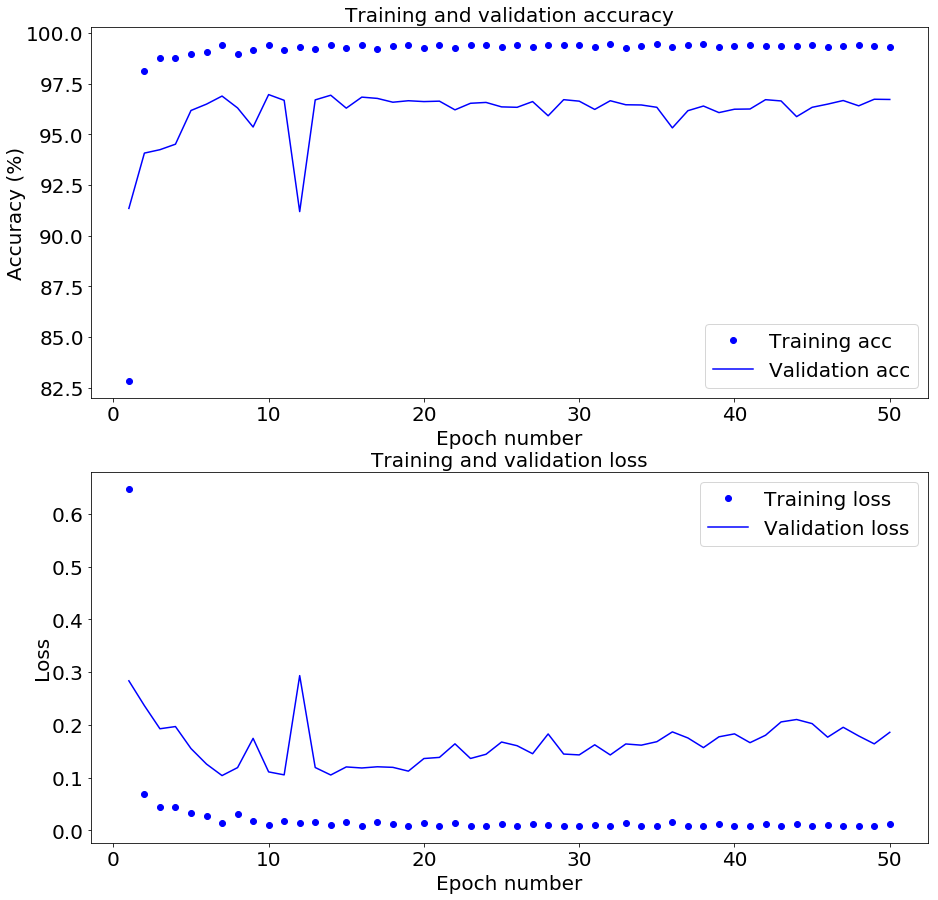

In [16]:
def plotModel(history):
    fg, (ax1, ax2) = plt.subplots(2,1,figsize = (15, 15)) # creating subplots
    # calculating percentage accuracy and loss for training and validation
    acc = np.array(history.history['categorical_accuracy'])*100
    val_acc = np.array(history.history['val_categorical_accuracy'])*100
    loss = history.history['loss']
    val_loss = history.history['val_loss']
 
    epochs = range(1, len(acc) + 1) # calculating x-axis values
    fnt = {'fontsize': 20,
           'fontweight' : 'medium',
           'verticalalignment': 'baseline'} # dictionary to control font for labels & title

    # plotting accuracy
    ax1.plot(epochs, acc, 'bo', label='Training acc')
    ax1.plot(epochs, val_acc, 'b', label='Validation acc')
    ax1.set_title('Training and validation accuracy', fnt)
    ax1.set_xlabel('Epoch number', fnt, labelpad = 20)
    ax1.set_ylabel('Accuracy (%)', fnt)
    ax1.legend(fontsize = 20)

    # plotting loss
    ax2.plot(epochs, loss, 'bo', label='Training loss')
    ax2.plot(epochs, val_loss, 'b', label='Validation loss')
    ax2.set_title('Training and validation loss', fnt)
    ax2.set_xlabel('Epoch number', fnt, labelpad = 20)
    ax2.set_ylabel('Loss', fnt)
    ax2.legend(fontsize = 20)

    # changing font size of tick labels
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax2.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax2.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    return fg
    
fg = plotModel(history)    
fg.savefig('modelResults.png')# saving the figure

## Insights from the plots
The following points are to be noted from the plots above:
1. After epoch number 10, both the training accuracy and loss do not change alot.
2. The validation loss and accuracy never reach the traing loss and accuracy.
3. After epoch number 10, the validation loss seems to increase as the epoch number increases. **What this shows is that we might be overfitting the data. In other terms, the model might be memorizing instead of learning!. We will solve this later using image augmentation and by modifying the model architecture**.

## Testing the model
Now let's test the model on the test data set. As before we will prepare the images by generating batches of images for the test data. Then we will use 'evaluate_generator' method to calculate loss and accuracy for the test data.

In [17]:
# Creating the test_generator
test_generator = datagen.flow_from_directory(path['Test'],
                                             target_size = (100,100),
                                             batch_size = 1,
                                             class_mode = 'categorical') # testing in bathches of 5

Found 3155 images belonging to 75 classes.


In [18]:
# Calculating the test loss and accuracy
test_loss, test_acc = model.evaluate_generator(test_generator, steps = 3155)

In [19]:
# printing the test loss and accuracy
print("Test accuracy for the model is %0.2f %s. \n" % (test_acc*100, '%'))
print('Test loss for the model is %0.2f .' % test_loss)

Test accuracy for the model is 96.70 %. 

Test loss for the model is 0.20 .


## Summarizing important results
1. Validation loss shows a slight but steady increase as epoch number increases along with high variability.
2. Validation loss and accuracy never reach the values close to training loss and accuracy.   
3. *We might be overfitting the data.*
4. The accuracy on the training data set and validation data set is around 97.59 %.
      
Now we will tweak the model architecture and we will use image augmentation to see if we are able to overcome overfitting. We will also see if this improves  model accuracy on test data.

## ConvNet with data augmentation and drop outlayer
Now we will build a new model with two changes:
1. We will modify the model architechture, with the major change being the addition of a dropout layer.
2. We will use data augmentation to transform the training data.

## Why a drop out layer
The problem that we are trying to solve is our model memorizing patterns. Essesntially, a drop out layer randomly removes a sub set of neurons. We are basically introducing noise to the data so that our model doesn't learn patterns that are not significant.

In [20]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        input_shape=(100, 100, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), 
                        activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten()) 

model2.add(layers.Dropout(0.5)) # adding a drop out layer

model2.add(layers.Dense(512, 
                       activation='relu'))
model2.add(layers.Dense(CnnP['No classes'], 
                       activation='softmax')) 

## Why data augmentation
Before moving forward and building our model let's first understand the purpose of data augmentation. We want to overcome overfitting. To do this, one approach we can take is to generate new images from the same dataset that have been transformed in a certain way. This transformation involves image rotation, image shear, image shift etc. Summed up in a word, this process is called 'data augmentation'.    
The following ImageDataGenerator object will create a generator object which will perform data augmentation for us.

In [21]:
# Making an image data generator object with augmentation 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

## Visualizing data augmentation
We can see data augmentation in action. For this we will chose an image from our data and use 'train_datagen'  to generate augmented images which we will then plot.

First let's use an image to augment. For this example, we will chose an orange from the training data set.

In [22]:
# This list contains names of images in folder named orange
imgs_orange = [os.path.join(path['Test'],'Orange',img) for img in os.listdir(os.path.join(path['Test'],'Orange'))]

Let's select the first image in the 'Orange' directory' and load it.

In [23]:
img = image.load_img(imgs_orange[0])

Now, we need to perform two steps: 
1. Convert the image to a numpy array and,
2. reshape the image to 4 dimensions. These steps are required for keras image data generator to be able to generate images.

In [24]:
img_ar = image.img_to_array(img) # convert image to a numpy array
img_ar = img_ar.reshape((1,) + img_ar.shape) # reshape the image

Now, we can see data augmentation in action.

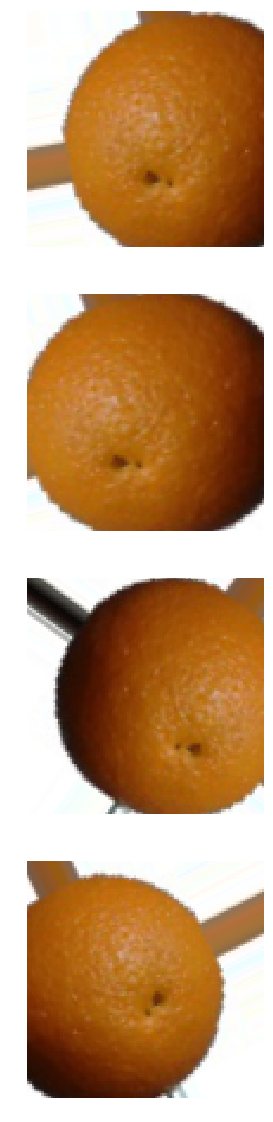

In [25]:
# Creating a figure with 4 subplots
fg, ax = plt.subplots(4, 1, figsize = (20,20))

# variable for referring to an axis
k = 0 

# Using train_datagen to generate randomly transformed images
for batch in train_datagen.flow(img_ar, batch_size=1):
    
    ax[k].imshow(image.array_to_img(batch[0]))
    ax[k].axis('off')
    k += 1 # updating value of k
    if k == 4: # we only want to see 4 images (we have 4 subplots so lets break if k is equal to 4)
        break
        
fg.savefig('augmentedImages.png')# saving the figure

The images above show data augmentation in action. It is just generation of a number of images by performing random transformations on a single image. 

## Moving forward and generating images for training and validation dataset
Now we can use our created 'train_datagen' to generate batches of images for the training data set. But ** we can not use this generator for validation and testing images. These images should not be transformed in any way**. We only need to rescale them so that pixel values are between 0 and 1.

Creating image generator to use for validation and test data set. Here, we only rescale the images.

In [26]:
datagen = ImageDataGenerator(rescale=1./255) 

In [27]:
# Using the generator for training directory
train_generator = train_datagen.flow_from_directory(path['Training'],
                                              target_size = (100,100),
                                              batch_size = CnnP['Training batch size'],
                                              class_mode='categorical')

Found 37836 images belonging to 75 classes.


In [28]:
# Using the generator validation directory
validation_generator = datagen.flow_from_directory(path['Validation'],
                                                   target_size = (100,100),
                                                   batch_size = CnnP['Validation batch size'],
                                                   class_mode = 'categorical')

Found 9554 images belonging to 75 classes.


## Compile and fit the model

In [29]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr=1e-4),
              metrics = [metrics.categorical_accuracy])

In [30]:
# Fitting the model
history2 = model2.fit_generator(train_generator,
                              steps_per_epoch = CnnP['Training steps/epoch'],
                              epochs = 50,
                              validation_data = validation_generator,
                              validation_steps = CnnP['Validation steps/epoch'])

Epoch 1/50
2102/2102 [==============================] - 151s 72ms/step - loss: 1.8752 - categorical_accuracy: 0.4415 - val_loss: 0.5370 - val_categorical_accuracy: 0.8322
Epoch 2/50
2102/2102 [==============================] - 149s 71ms/step - loss: 0.6562 - categorical_accuracy: 0.7765 - val_loss: 0.3349 - val_categorical_accuracy: 0.8926
Epoch 3/50
2102/2102 [==============================] - 148s 71ms/step - loss: 0.4159 - categorical_accuracy: 0.8562 - val_loss: 0.1702 - val_categorical_accuracy: 0.9362
Epoch 4/50
2102/2102 [==============================] - 150s 71ms/step - loss: 0.3074 - categorical_accuracy: 0.8912 - val_loss: 0.1085 - val_categorical_accuracy: 0.9583
Epoch 5/50
2102/2102 [==============================] - 151s 72ms/step - loss: 0.2418 - categorical_accuracy: 0.9117 - val_loss: 0.1133 - val_categorical_accuracy: 0.9471
Epoch 6/50
2102/2102 [==============================] - 150s 71ms/step - loss: 0.2054 - categorical_accuracy: 0.9262 - val_loss: 0.1171 - val_cat

Epoch 49/50
2102/2102 [==============================] - 151s 72ms/step - loss: 0.0366 - categorical_accuracy: 0.9849 - val_loss: 0.0302 - val_categorical_accuracy: 0.9889
Epoch 50/50
2102/2102 [==============================] - 156s 74ms/step - loss: 0.0356 - categorical_accuracy: 0.9849 - val_loss: 0.0433 - val_categorical_accuracy: 0.9853


As before we save the model and it's weights and plot the results.

In [31]:
model_json = model2.to_json() # serialize model to JSON
# writing the model as a json file
with open("fruit_classification_model_dropout.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("fruit_classification_weights_augmented.h5") # saving model weights as HDF5
print("Model Saved")

Model Saved


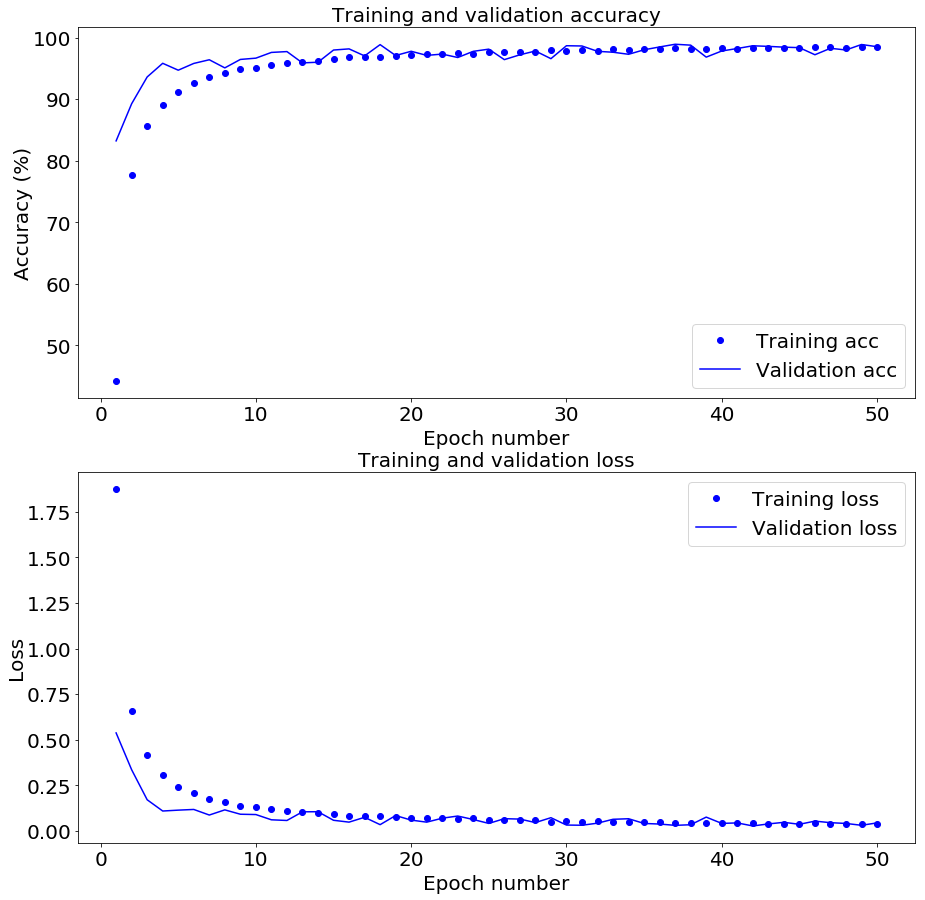

In [32]:
fg = plotModel(history2)    
fg.savefig('modelResultsAugmentation.png')# saving the figure

## Summarizing important results
1. Validation loss ** DOES NOT** show a steady increase as epoch number increases.Alsom the variability is low.
2. Validation loss and accuracy reach the values close to training loss and accuracy.   
3. *We are not overfitting the data.*
      
By tweaking the model architecture and using image augmentation we have overcome overfitting. Now let's evaluate model accuracy on test data.

In [33]:
# Calculating the test loss and accuracy
test_loss2, test_acc2 = model2.evaluate_generator(test_generator, steps = 3155)

In [34]:
# printing the test loss and accuracy
print("Test accuracy for the model is %0.2f %s. \n" % (test_acc2*100, '%'))
print('Test loss for the model is %0.2f .' % test_loss2)

Test accuracy for the model is 98.64 %. 

Test loss for the model is 0.03 .


1. ** The accuracy increase from 96.7 % to 98 .6 %, and the loss decreases from 0.20 to 0.03**. 
At the end, we just need to remove the extracted files from the working directory.

In [35]:
import shutil
shutil.rmtree('working')

## Suplimentary figure
To observe the effect of data augmentation and addition of a drop out layer, we can plot loss and accuracy for both models on the same plot. This will highlight the change. 

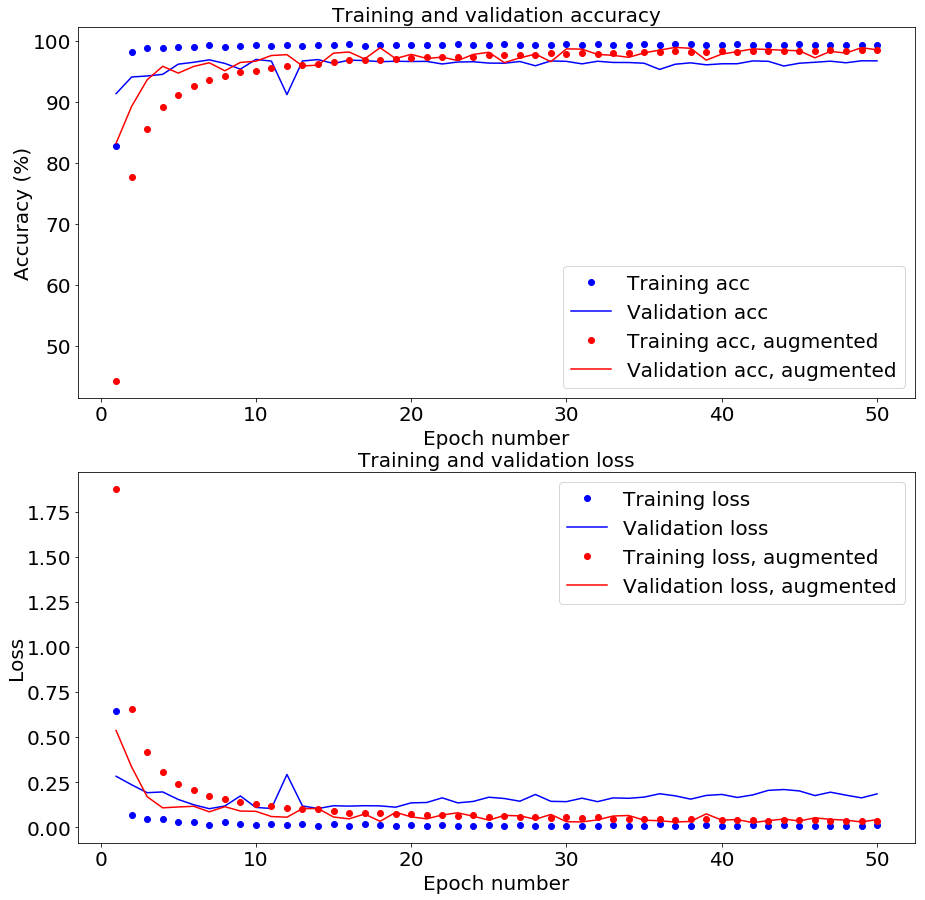

In [36]:
fg, (ax1, ax2) = plt.subplots(2,1,figsize = (15, 15)) # creating subplots

# calculating percentage accuracy and loss for training and validation
acc1 = np.array(history.history['categorical_accuracy'])*100
val_acc1 = np.array(history.history['val_categorical_accuracy'])*100

loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = np.array(history2.history['categorical_accuracy'])*100
val_acc2 = np.array(history2.history['val_categorical_accuracy'])*100

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
 
epochs = range(1, len(acc1) + 1) # calculating x-axis values

fnt = {'fontsize': 20,
        'fontweight' : 'medium',
        'verticalalignment': 'baseline'} # dictionary to control font for labels & title

# plotting accuracy
ax1.plot(epochs, acc1, 'bo', label='Training acc')
ax1.plot(epochs, val_acc1, 'b', label='Validation acc')

ax1.plot(epochs, acc2, 'ro', label='Training acc, augmented')
ax1.plot(epochs, val_acc2, 'r', label='Validation acc, augmented')

ax1.set_title('Training and validation accuracy', fnt)
ax1.set_xlabel('Epoch number', fnt, labelpad = 20)
ax1.set_ylabel('Accuracy (%)', fnt)
ax1.legend(fontsize = 20)

# plotting loss
ax2.plot(epochs, loss1, 'bo', label='Training loss')
ax2.plot(epochs, val_loss1, 'b', label='Validation loss')

ax2.plot(epochs, loss2, 'ro', label='Training loss, augmented')
ax2.plot(epochs, val_loss2, 'r', label='Validation loss, augmented')

ax2.set_title('Training and validation loss', fnt)
ax2.set_xlabel('Epoch number', fnt, labelpad = 20)
ax2.set_ylabel('Loss', fnt)
ax2.legend(fontsize = 20)

# changing font size of tick labels
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    for tick in ax2.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax2.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    